### 1. Import the necessary libraries

In [1]:
# do not show warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
from datetime import datetime

### 2. Data cleaning 

This chapter contains the following:
- Missing value handling
- Inconsistent data handling
- Rename columns and values and drop unnecessary columns
- Duplicate data handling
- Outlier handling

In [3]:
file = pd.read_csv('InternalCallList(1).csv')

In [4]:
df=pd.DataFrame(file)
df

,Nr.,Day,Date,Duration,Extension1,Ext.1 Name,Ext.1 Dep.,Extension2,Ext.2 Name,Ext.2 Dep.,Type,Status,Ring Time
0,1,Tue,3/14/2023 18:30,0:00:00,412,NaN,NaN,755,NaN,NaN,Inc.,Unansw.,0 sec.
1,2,Tue,3/14/2023 18:30,0:00:00,755,NaN,NaN,412,NaN,NaN,Out,Unansw.,0 sec.
2,3,Tue,3/14/2023 16:56,0:01:19,122,Alangari Mohammed,CyberSecurity Department,430,Aldawsari Mohammed,Information Technology,Inc.,Answ.,5 sec.
3,4,Tue,3/14/2023 16:56,0:01:19,430,Aldawsari Mohammed,Information Technology,122,Alangari Mohammed,CyberSecurity Department,Out,Answ.,5 sec.
4,5,Tue,3/14/2023 16:50,0:00:00,310,ali faiqah,Electro-Optics Systems Lab,105,shah syed,Strategic Planning / VRO,Inc.,Unansw.,20 sec.
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,Sun,2/26/2023 11:21,0:00:00,118,Alwail Fahad,Documents and Archiving Center,400,Alyahya Ibrahim,FSS Management,Out,Unansw.,30 sec.
9996,9997,Sun,2/26/2023 11:20,0:00:31,428,Bin Sulaytin Abdullah,Information Technology,415,alkhunayfir meshari,Information Technology,Inc.,Answ.,4 sec.
9997,9998,Sun,2/26/2023 11:20,0:00:31,415,alkhunayfir meshari,Information Technology,428,Bin Sulaytin Abdullah,Information Technology,Out,Answ.,4 sec.
9998,9999,Sun,2/26/2023 11:17,0:01:10,407,binsheewen abdulaziz,Facilities Management Department,408,Alquraishi Musaad,Financial Accounting,Inc.,Answ.,16 sec.


In [5]:
df.shape

(10000, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Nr.         10000 non-null  int64 
 1   Day         10000 non-null  object
 2   Date        10000 non-null  object
 3   Duration    10000 non-null  object
 4   Extension1  10000 non-null  int64 
 5   Ext.1 Name  9275 non-null   object
 6   Ext.1 Dep.  9250 non-null   object
 7   Extension2  10000 non-null  int64 
 8   Ext.2 Name  9275 non-null   object
 9   Ext.2 Dep.  9250 non-null   object
 10  Type        10000 non-null  object
 11  Status      10000 non-null  object
 12  Ring Time   10000 non-null  object
dtypes: int64(3), object(10)
memory usage: 1015.8+ KB


In [7]:
df.describe()

,Nr.,Extension1,Extension2
count,10000.00000,10000.00000,10000.00000
mean,5000.50000,349.12010,349.12010
std,2886.89568,260.46436,260.46436
min,1.00000,102.00000,102.00000
25%,2500.75000,218.00000,218.00000
50%,5000.50000,411.00000,411.00000
75%,7500.25000,424.00000,424.00000
max,10000.00000,7600.00000,7600.00000


#### 1. Inconsistent data handling

In [8]:
df['Date'] = pd.to_datetime(df['Date'],errors='coerce')

In [9]:
df["Date"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: Date
Non-Null Count  Dtype         
--------------  -----         
10000 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 78.2 KB


In [10]:
df.head(1)

,Nr.,Day,Date,Duration,Extension1,Ext.1 Name,Ext.1 Dep.,Extension2,Ext.2 Name,Ext.2 Dep.,Type,Status,Ring Time
0,1,Tue,2023-03-14 18:30:00,0:00:00,412,NaN,NaN,755,NaN,NaN,Inc.,Unansw.,0 sec.


In [11]:
df['Duration'] = pd.to_timedelta(df['Duration'])

In [12]:
df.head(5)

,Nr.,Day,Date,Duration,Extension1,Ext.1 Name,Ext.1 Dep.,Extension2,Ext.2 Name,Ext.2 Dep.,Type,Status,Ring Time
0,1,Tue,2023-03-14 18:30:00,0 days 00:00:00,412,NaN,NaN,755,NaN,NaN,Inc.,Unansw.,0 sec.
1,2,Tue,2023-03-14 18:30:00,0 days 00:00:00,755,NaN,NaN,412,NaN,NaN,Out,Unansw.,0 sec.
2,3,Tue,2023-03-14 16:56:00,0 days 00:01:19,122,Alangari Mohammed,CyberSecurity Department,430,Aldawsari Mohammed,Information Technology,Inc.,Answ.,5 sec.
3,4,Tue,2023-03-14 16:56:00,0 days 00:01:19,430,Aldawsari Mohammed,Information Technology,122,Alangari Mohammed,CyberSecurity Department,Out,Answ.,5 sec.
4,5,Tue,2023-03-14 16:50:00,0 days 00:00:00,310,ali faiqah,Electro-Optics Systems Lab,105,shah syed,Strategic Planning / VRO,Inc.,Unansw.,20 sec.


In [13]:
df["Duration"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: Duration
Non-Null Count  Dtype          
--------------  -----          
10000 non-null  timedelta64[ns]
dtypes: timedelta64[ns](1)
memory usage: 78.2 KB


In [14]:
df['Ring Time'] = df['Ring Time'].str.replace("sec.", "")

In [15]:
df['Ring Time'].value_counts()

3       1118
4       1020
5        648
6        582
2        434
        ... 
120        2
86         2
98         2
627        2
647        2
Name: Ring Time, Length: 183, dtype: int64

In [16]:
df['Ring Time'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: Ring Time
Non-Null Count  Dtype 
--------------  ----- 
10000 non-null  object
dtypes: object(1)
memory usage: 78.2+ KB


In [17]:
df['Ring Time'] = pd.to_numeric(df['Ring Time'])

In [18]:
df['Ring Time'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: Ring Time
Non-Null Count  Dtype
--------------  -----
10000 non-null  int64
dtypes: int64(1)
memory usage: 78.2 KB


In [19]:
df['Nr.'] = df['Nr.'].apply(str)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype          
---  ------      --------------  -----          
 0   Nr.         10000 non-null  object         
 1   Day         10000 non-null  object         
 2   Date        10000 non-null  datetime64[ns] 
 3   Duration    10000 non-null  timedelta64[ns]
 4   Extension1  10000 non-null  int64          
 5   Ext.1 Name  9275 non-null   object         
 6   Ext.1 Dep.  9250 non-null   object         
 7   Extension2  10000 non-null  int64          
 8   Ext.2 Name  9275 non-null   object         
 9   Ext.2 Dep.  9250 non-null   object         
 10  Type        10000 non-null  object         
 11  Status      10000 non-null  object         
 12  Ring Time   10000 non-null  int64          
dtypes: datetime64[ns](1), int64(3), object(8), timedelta64[ns](1)
memory usage: 1015.8+ KB


#### 2. Rename columns and values and drop unnecessary columns

In [21]:
df = df.drop(['Extension1' ,'Extension2'], axis=1)

In [22]:
df.rename(columns = {"Nr.":"No","Ext.1 Name":"Extension1_Name","Ext.2 Name":"Extension2_Name",
                     "Ext.1 Dep.":"Extension1_Department","Ext.2 Dep.":"Extension2_Department",
                     "Ring Time":"Ring_time_per_second"},inplace=True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   No                     10000 non-null  object         
 1   Day                    10000 non-null  object         
 2   Date                   10000 non-null  datetime64[ns] 
 3   Duration               10000 non-null  timedelta64[ns]
 4   Extension1_Name        9275 non-null   object         
 5   Extension1_Department  9250 non-null   object         
 6   Extension2_Name        9275 non-null   object         
 7   Extension2_Department  9250 non-null   object         
 8   Type                   10000 non-null  object         
 9   Status                 10000 non-null  object         
 10  Ring_time_per_second   10000 non-null  int64          
dtypes: datetime64[ns](1), int64(1), object(8), timedelta64[ns](1)
memory usage: 859.5+ KB


In [24]:
df["Type"]=df["Type"].map({"Inc." : "Income" , "Out" : "Outcome"})
df["Type"].value_counts()

Income     5000
Outcome    5000
Name: Type, dtype: int64

In [25]:
df["Status"]=df["Status"].map({"Answ." : "Answer" , "Unansw." : "Unnswer"})
df["Status"].value_counts()

Answer     5456
Unnswer    4544
Name: Status, dtype: int64

In [26]:
df['Extension1_Name'] = df['Extension1_Name'].str.split(" ").str[1]
df['Extension2_Name'] = df['Extension2_Name'].str.split(" ").str[1]

In [27]:
df["Extension1_Name"].value_counts()

Abdulelah      673
Abdullah       399
mohammed       344
muhrah         324
meshal         314
              ... 
Sara             2
Saleh            1
suliman          1
Muntasir         1
Abdulfattah      1
Name: Extension1_Name, Length: 104, dtype: int64

In [28]:
df["Extension2_Name"].value_counts()

Abdulelah      673
Abdullah       399
mohammed       344
muhrah         324
meshal         314
              ... 
Sara             2
Saleh            1
suliman          1
Muntasir         1
Abdulfattah      1
Name: Extension2_Name, Length: 104, dtype: int64

#### 3. Outlier handling

Ring_time_per_second    AxesSubplot(0.125,0.11;0.775x0.77)
dtype: object

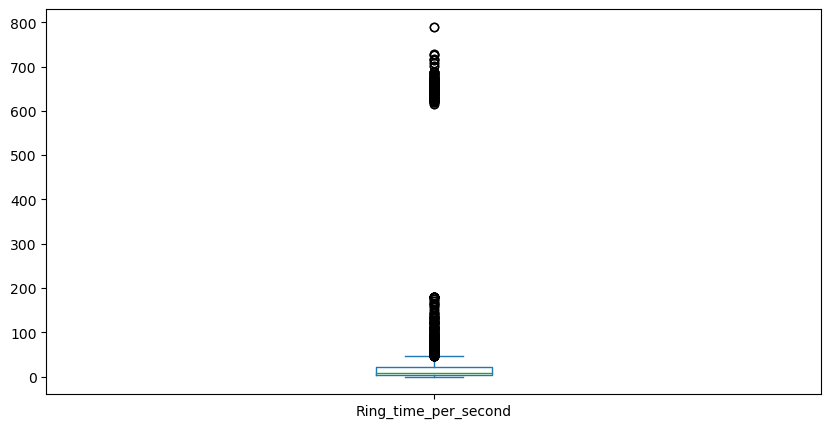

In [29]:
#show the outlier
df.plot(kind ='box', subplots=True,figsize=(10,5))

In [30]:
Q1 = df.Ring_time_per_second.quantile(0.25)
Q3 = df.Ring_time_per_second.quantile(0.75)
IQR = Q3-Q1
upper = Q3 + 1.5*IQR
df.loc[df["Ring_time_per_second"] > upper,"Ring_time_per_second"] = upper

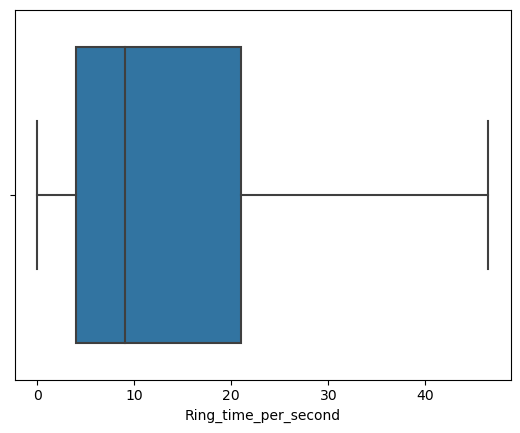

In [31]:
sns.boxplot(x = df["Ring_time_per_second"]);

#### 4. Missing value handling

In [32]:
# check for null values 
df.isnull().sum()

No                         0
Day                        0
Date                       0
Duration                   0
Extension1_Name          725
Extension1_Department    750
Extension2_Name          725
Extension2_Department    750
Type                       0
Status                     0
Ring_time_per_second       0
dtype: int64

In [33]:
# Filling missing values
df['Extension1_Name'].fillna(df['Extension1_Name'].mode()[0], inplace=True)
df['Extension2_Name'].fillna(df['Extension2_Name'].mode()[0], inplace=True)
df['Extension1_Department'].fillna(df['Extension1_Department'].mode()[0], inplace=True)
df['Extension2_Department'].fillna(df['Extension2_Department'].mode()[0], inplace=True)

In [34]:
df.isnull().sum()

No                       0
Day                      0
Date                     0
Duration                 0
Extension1_Name          0
Extension1_Department    0
Extension2_Name          0
Extension2_Department    0
Type                     0
Status                   0
Ring_time_per_second     0
dtype: int64

#### 5. Duplicate data handling

In [35]:
# Check for duplicate value
sum(df.duplicated())

0

In [36]:
df.shape

(10000, 11)